<a href="https://colab.research.google.com/github/linxunshan/CS448_Assignment_3/blob/main/CS448_Assigment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS448 Assignment 3

## Abstract

The dataset I've selected for line regression is a dataset about fish market. The reason I choose this dataset is just because I like to eat fish and want to know some knowlegde about fish market. And the dataset for classfication I chose is Gender Classification. With the rise of feminism, the difference between males and females in terms of their personal preferences has decreased in recent years. For instance, historically in many cultures, warm colors such as red and pink were thought of as feminine colors while cool colors such as blue were considered masculine. Today, such ideas are considered outdated. I want to see if we can predict gender by knowing the favorite thing from different gender . I like to use multiple algorithms for classfication such as KNN,  Logistic Regression and Support Vector Machine. Finally, compare the accuracy score between them. I hope I can have basic knowledge of ML code over the course of this notebook and I always like to learn interesting code!

### Section 1: Regression Dataset Prep

A fish market is a marketplace for selling fish products. It can be dedicated to wholesale trade between fishermen and fish merchants, or to the sale of seafood to individual consumers, or to both. Retail fish markets, a type of wet market, often sell street food as well. This dataset contains several measurements for seven different fish species. 

The column names are not very intuitive, so below I describe each of them (which are also described in the original dataset page):

1. `Species`: species measured, there are seven in total.
2. `Weight`: Fish weight in grams.
3. `Length1`: vertical length in cm.
4. `Length2`: diagonal length in cm.
5. `Length3`: cross length in cm.
6. `Height`: Height in cm.
7. `Width`: diagonal width in cm.

In [116]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [22]:
# read data
data=pd.read_csv(r'C:\\Users\linxu\OneDrive\Desktop\archive\Fish.csv')

In [8]:
# basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [9]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


#### Data Cleaning

This will help to identify any Unknow/Junk values present in the dataset.

In [35]:
data.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


In [10]:
data.shape

(159, 7)

Before I use linear regression, I decide to use the columns, length1 (vertical length in cm) and length3 (cross length in cm). I want to see the relationship between vertical length and cross length for all fish species. So I firstly plot the data from these two columns to how these data fits.

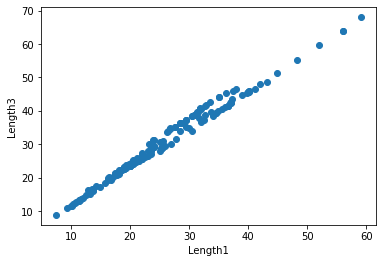

In [17]:
# plot data
import matplotlib.pyplot as plt

plt.scatter(data['Length1'],data['Length3'])
plt.xlabel('Length1')
plt.ylabel('Length3')
plt.show()

### Section 2: Regression

b0: [[0.98551671]]
b0 [0.98551671]
b1 [[1.15218241]]


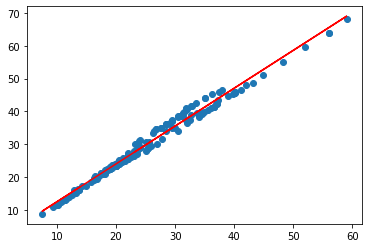

In [15]:
# import library 
from sklearn.linear_model import LinearRegression

# linear regression model
linear_reg=LinearRegression()

x=data['Length1'].values.reshape(-1,1)
y=data['Length3'].values.reshape(-1,1) #convert vector to matrix

# line fit 
# feeding the training data to the model
linear_reg.fit(x,y)

# prediction
b0=linear_reg.predict([[0]])

print('b0:',b0)

b0_=linear_reg.intercept_ # The point where the y-axis intersects

print('b0',b0_)

b1=linear_reg.coef_ # slope
print('b1',b1)

# Length2=0.29 + 1.07* Length1 

# visualize line 

plt.scatter(x,y)


y_head=linear_reg.predict(x) 

plt.plot(x,y_head,color='red')
plt.show()

####  r square with linear regression

In [16]:
# r square with linear regression

from sklearn.metrics import r2_score

print('r2 score:',r2_score(y,y_head))


r2 score: 0.984125491755971


#### Comment on the result of this regression

As we can see, the line regession fits almost perfect in these two columns, r2 score is about 0.984. The reason I guess is because as fish's vertical length grows, its cross length grows as well. They grow proportionally.

### Section 3: Classification Dataset Prep

Gender is a social construct. The way males and females are treated differently since birth moulds their behaviour and personal preferences into what society expects for their gender. This small dataset is designed to provide an idea about whether a person's gender can be predicted with an accuracy significantly above 50% based on their personal preferences.

I will try to predict genders of participants given some information about them such as Favorite Color, Favorite Music Genre, Favorite Beverage, Favorite Soft Drink.

I will use KNN, Logistic Regression and Support Vector Machine to do the classfication and compare the Accuracy score between them.

The column names are also not very intuitive, so below I describe each of them (which are also described in the original dataset page):

1. `Favorite Color`: Favorite color (colors reported by respondents were mapped to either warm, cool or neutral)
2. `Favorite Music Genre`: Favorite broad music genre
3. `Favorite Beverage`: Favorite alcoholic drink
4. `Favorite Soft Drink	`: Favorite fizzy drink
5. `Gender`: Binary gender as reported by the respondents

In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [25]:
df = pd.read_csv(r'C:\\Users\linxu\OneDrive\Desktop\archive\Transformed Data Set - Sheet1.csv')

#### Initial Data Analysis

In [26]:
df.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [27]:
df.isnull().sum()

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


all 4 features are object type and there is no null values in the data set. so we need to go with onehot encoding to convert the categorical values.

#### Importing plotting libraries

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

Plot all columns using SNS countplot.

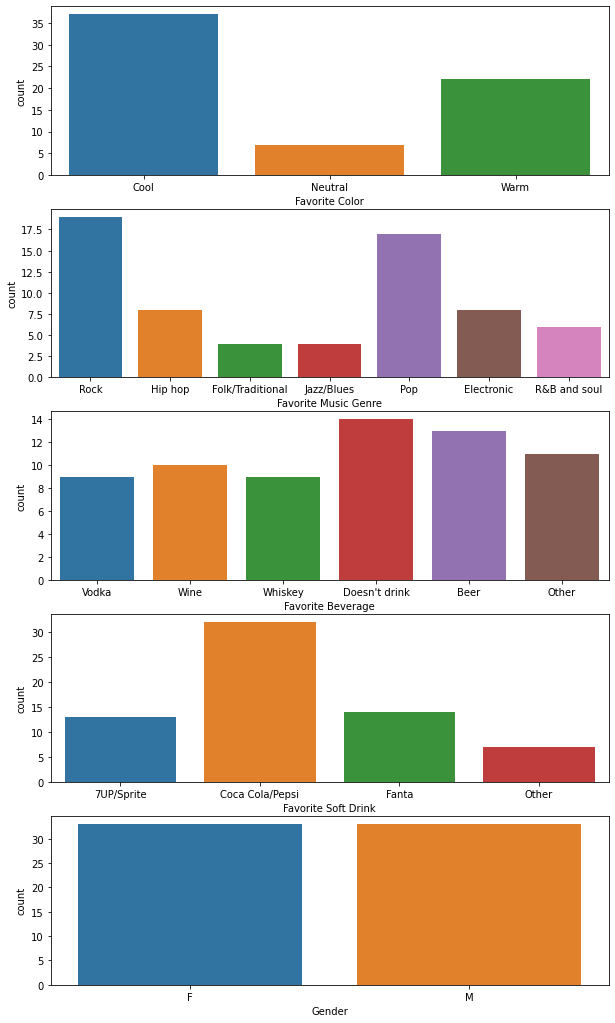

In [76]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10,18))
for i in range(len(df.columns)):
    sns.countplot(data=df, x=df.iloc[:,i],ax=axes[i])
    

In [114]:
len(df)

66

### Section 4: Classification

#### Train Test Split

In [77]:
X=df.drop('Gender',axis=1)
y=df['Gender']

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [79]:
cols=list(X.columns)

In [36]:
cols

['Favorite Color',
 'Favorite Music Genre',
 'Favorite Beverage',
 'Favorite Soft Drink']

#### Encode categorical values

In [80]:
from sklearn.preprocessing import OneHotEncoder
onehot= OneHotEncoder()
from sklearn.compose import ColumnTransformer
clt = ColumnTransformer([('binarize',onehot,cols)], remainder='passthrough')

In [81]:
X_train=clt.fit_transform(X_train)
X_test=clt.transform(X_test)

#### Creating model & metrics
##### KNeighboursClassifier

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
test_score=[]
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_hat=knn.predict(X_test)
    score= 1-accuracy_score(y_test,y_hat)
    test_score.append(score)

Lets us first evaluate with KNeighboutClassifier with different n_neighbour values

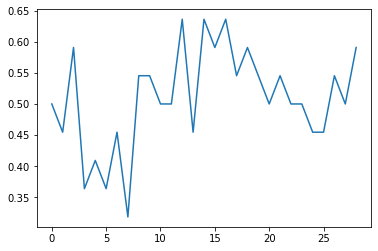

In [56]:
plt.plot(test_score)

##### Logistic Regression - Cross Validation

In [110]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state=42)
logit.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [112]:
Logit_pred=model.predict(X_test)
accuracy_score(y_test,Logit_pred)

0.5454545454545454

##### Support Vector Machine - Classification

In [113]:
from sklearn.svm import SVC
svc =SVC()
svc.fit(X_train,y_train)
pred_svc = svc.predict(X_test)
accuracy_score(y_test,pred_svc)

0.5909090909090909

Accuracy score is better compared to other 2 models

In [117]:
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           F       0.75      0.46      0.57        13
           M       0.50      0.78      0.61         9

    accuracy                           0.59        22
   macro avg       0.62      0.62      0.59        22
weighted avg       0.65      0.59      0.59        22



#### Comment on the result of this regression
Reason for the low accuracy:
1. Dataset is small - 66 rows
2. we splited the data set with Test & Train datasets.

### Conclusions

In conclusion, I found out that as fish's vertical length grows, its cross length grows as well in line regression. All data is surrounding the estimated line. And for classfication, I figured out Support Vector Machine has better accuarcy rate in this case. The accuracy rate for predicting gender is about 0.59 by using Support Vector Machine. KNN has different accuracy scores based on the number of n neighbor. The lowest rate is about 0.31 and the highest one is about 0.64. And Logistic Regression onle has 0.54. The reason for the low accuracy is because dataset is small (66 rows) and we splited the dataset with Test and train datasets, it makes dataset become more smaller. The most interesting thing that I found is different algorithm has different accuracy rate and ML code is very interesting for me! I would like to use Multi-Layer Perceptron (Neural Networks) to make classfication and do more line regression between different columns for my first dataset if extending the project further. 

Lastly, I really enjoy learning AI with you in this semester! Thank you very much! You are the best!